# **Adding patch and finding Ground Truth.**

In [ ]:
!git clone https://github.com/DepthAnything/Depth-Anything-V2
%cd Depth-Anything-V2
!pip install -r requirements.txt

Cloning into 'Depth-Anything-V2'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 136 (delta 41), reused 35 (delta 35), pack-reused 75 (from 1)
Receiving objects: 100% (136/136), 45.17 MiB | 12.73 MiB/s, done.
Resolving deltas: 100% (44/44), done.
/content/Depth-Anything-V2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64

In [ ]:
pip install opencv-python yolov8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 50.5 MB/s eta 0:00:00


In [ ]:
import shutil

# Specify the source path (the file you want to copy)
source_path = '/content/drive/MyDrive/colab_output/depth_anything_v2_vits.pth'

# Specify the destination path (where you want to copy the file to)
destination_path = '/content/Depth-Anything-V2/checkpoints/depth_anything_v2_vits.pth'

# Copy the file
shutil.copyfile(source_path, destination_path)

print(f"File copied from {source_path} to {destination_path}")

File copied from /content/drive/MyDrive/colab_output/depth_anything_v2_vits.pth to /content/Depth-Anything-V2/checkpoints/depth_anything_v2_vits.pth


## **Mounting google drive to import the dataset.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os

In [ ]:
zip_file_path = '/content/drive/My Drive/colab_output/test.zip'
extract_dir = '/content/test'

In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# **Code to augment adversarial patch to the images by detecting car using YOLOv8**

In [ ]:
import sys
import os
import cv2
import torch
from torchvision import transforms
import numpy as np

# Add the cloned Depth-Anything-V2 repository to the path
sys.path.append('/content/Depth-Anything-V2')

from ultralytics import YOLO

# Device configuration
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the YOLOv8 model for car detection
yolo_model = YOLO('yolov8n.pt')

# Suppress YOLOv8 detailed output
yolo_model.overrides['verbose'] = False

# Paths to the input folder, and output folders for patched images
input_folder = '/content/test/images'
output_folder_patched = '/content/test_patched/images'

os.makedirs(output_folder_patched, exist_ok=True)

# Load your adversarial patch
patch_path = '/content/texture_seed.png'  # Change to your patch path
adv_patch_image = cv2.imread(patch_path)
adv_patch_image = cv2.cvtColor(adv_patch_image, cv2.COLOR_BGR2RGB)

# Transform the adversarial patch without resizing
patch_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])
adv_patch_tensor = patch_transform(adv_patch_image).to(DEVICE)

# Function to resize and apply the adversarial patch based on bounding box size
def apply_patch(image, patch, location):
    # Calculate patch size based on 50% of the bounding box height (and make it square)
    bbox_height = location[3] - location[1]
    patch_size = int(bbox_height * 0.7)  # Square patch with height and width 50% of the bounding box height

    # Resize the patch to be square
    patch_resized = torch.nn.functional.interpolate(patch.unsqueeze(0), size=(patch_size, patch_size), mode='bilinear', align_corners=False).squeeze(0)

    # Calculate position for patch placement (center-top)
    center_top_y = location[1]
    center_top_x = location[0] + (location[2] - location[0]) // 2 - (patch_size // 2)
    top_left_y = max(center_top_y, 0)
    top_left_x = max(center_top_x, 0)
    bottom_right_y = min(top_left_y + patch_size, image.shape[1])
    bottom_right_x = min(top_left_x + patch_size, image.shape[2])

    # Ensure the patch fits within the image dimensions
    patched_image = image.clone()
    patched_image[:, top_left_y:bottom_right_y, top_left_x:bottom_right_x] = patch_resized[:, :bottom_right_y-top_left_y, :bottom_right_x-top_left_x]

    return patched_image

# Process each image in the input folder
for idx, image_name in enumerate(os.listdir(input_folder), start=1):
    image_path = os.path.join(input_folder, image_name)
    raw_img = cv2.imread(image_path)

    if raw_img is None:
        print(f"Failed to load {image_path}")
        continue

    raw_img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

    # Detect the car in the image using YOLOv8
    results = yolo_model.predict(raw_img_rgb)
    car_detections = [det for det in results[0].boxes if int(det.cls[0]) == 2]  # Class 2 is for cars in COCO dataset

    if len(car_detections) > 0:
        car = car_detections[0]
        x1, y1, x2, y2 = int(car.xyxy[0][0]), int(car.xyxy[0][1]), int(car.xyxy[0][2]), int(car.xyxy[0][3])

        car_location = (x1, y1, x2, y2)
        patched_image = apply_patch(transforms.ToTensor()(raw_img_rgb).to(DEVICE), adv_patch_tensor, car_location)

        # Convert patched image to numpy for display and saving
        patched_image_np = patched_image.cpu().numpy().transpose(1, 2, 0)
        patched_image_np = (patched_image_np * 255).astype(np.uint8)

        # Save the patched image
        patched_image_bgr = cv2.cvtColor(patched_image_np, cv2.COLOR_RGB2BGR)
        patched_image_path = os.path.join(output_folder_patched, image_name)
        cv2.imwrite(patched_image_path, patched_image_bgr)

    # Print progress after each image
    print(f"Processed {idx} images")

# Print the final counters
print(f"\nProcessing complete. Patched images have been saved.")


Processed 1 images
Processed 2 images
Processed 3 images
Processed 4 images
Processed 5 images
Processed 6 images
Processed 7 images
Processed 8 images
Processed 9 images
Processed 10 images
Processed 11 images
Processed 12 images
Processed 13 images
Processed 14 images
Processed 15 images
Processed 16 images
Processed 17 images
Processed 18 images
Processed 19 images
Processed 20 images
Processed 21 images
Processed 22 images
Processed 23 images
Processed 24 images
Processed 25 images
Processed 26 images
Processed 27 images
Processed 28 images
Processed 29 images
Processed 30 images
Processed 31 images
Processed 32 images
Processed 33 images
Processed 34 images
Processed 35 images
Processed 36 images
Processed 37 images
Processed 38 images
Processed 39 images
Processed 40 images
Processed 41 images
Processed 42 images
Processed 43 images
Processed 44 images
Processed 45 images
Processed 46 images
Processed 47 images
Processed 48 images
Processed 49 images
Processed 50 images
Processed

# **Finding GT Depthmaps of pached images**

In [ ]:
import os
import cv2
import torch
import numpy as np
from depth_anything_v2.dpt import DepthAnythingV2

# Set device
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

# Model configurations
model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

# Choose the encoder
encoder = 'vits'  # or 'vits', 'vitb', 'vitg'

# Initialize the model
model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_{encoder}.pth', map_location='cpu'))
model = model.to(DEVICE).eval()

# Input and output directories
input_folder = '/content/test_patched/images'
output_folder = '/content/test_patched/deptmaps'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for img_name in os.listdir(input_folder):
    if img_name.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # filter for image files
        # Read the image
        img_path = os.path.join(input_folder, img_name)
        raw_img = cv2.imread(img_path)

        # Compute the depth map
        depth = model.infer_image(raw_img)  # HxW raw depth map in numpy

        # Normalize the depth map to 8-bit (0-255)
        depth_normalized = cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX)
        depth_normalized = depth_normalized.astype(np.uint8)

        # Apply the 'plasma' colormap
        depth_colormap = cv2.applyColorMap(depth_normalized, cv2.COLORMAP_PLASMA)

        # Save the depth map with the same name as the original image
        depth_output_path = os.path.join(output_folder, img_name)
        cv2.imwrite(depth_output_path, depth_colormap)

        print(f'Saved depth map with plasma colormap for {img_name} to {depth_output_path}')


Saved depth map with plasma colormap for epoch_3_augmented_img_5549.png to /content/test_patched/deptmaps/epoch_3_augmented_img_5549.png
Saved depth map with plasma colormap for epoch_3_augmented_img_4285.png to /content/test_patched/deptmaps/epoch_3_augmented_img_4285.png
Saved depth map with plasma colormap for epoch_2_augmented_img_2971.png to /content/test_patched/deptmaps/epoch_2_augmented_img_2971.png
Saved depth map with plasma colormap for epoch_2_augmented_img_2715.png to /content/test_patched/deptmaps/epoch_2_augmented_img_2715.png
Saved depth map with plasma colormap for epoch_2_augmented_img_2250.png to /content/test_patched/deptmaps/epoch_2_augmented_img_2250.png
Saved depth map with plasma colormap for epoch_2_augmented_img_4154.png to /content/test_patched/deptmaps/epoch_2_augmented_img_4154.png
Saved depth map with plasma colormap for epoch_1_augmented_img_319.png to /content/test_patched/deptmaps/epoch_1_augmented_img_319.png
Saved depth map with plasma colormap for au

In [ ]:
import shutil

shutil.rmtree('/content/patched')

In [ ]:
import shutil

# Path to the directory you want to zip
directory_to_zip = '/content/test_patched'  # Replace with your directory path

# Output zip file path
output_zip_path = '/content/test_patched.zip'  # Replace with your desired output path

# Create the zip file
shutil.make_archive(output_zip_path.replace('.zip', ''), 'zip', directory_to_zip)

print(f"Zip file created at {output_zip_path}")


Zip file created at /content/test_patched.zip


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your file and the destination directory in Google Drive
source = '/content/test_patched.zip'
destination_dir = '/content/drive/My Drive/colab_output'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Specify the full destination path including the filename
destination = os.path.join(destination_dir, 'test_patched.zip')

# Move the file
!cp "$source" "$destination"

print("File has been uploaded to your Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File has been uploaded to your Google Drive.


In [ ]:
import sys
import os
import cv2
import torch
from torchvision import transforms
import numpy as np

# Add the cloned Depth-Anything-V2 repository to the path
sys.path.append('/content/Depth-Anything-V2')

from depth_anything_v2.dpt import DepthAnythingV2
from ultralytics import YOLO

# Device configuration
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Model configuration for Depth-Anything v2
model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vits'  # Using 'vits' as per your specification

# Load the Depth-Anything v2 model
model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'/content/Depth-Anything-V2/checkpoints/depth_anything_v2_{encoder}.pth', map_location=DEVICE))
model = model.to(DEVICE).eval()

# Load the YOLOv8 model for car detection
yolo_model = YOLO('yolov8n.pt')

# Suppress YOLOv8 detailed output
yolo_model.overrides['verbose'] = False

# Paths to the input folder, and output folders for patched images and depth maps
input_folder = '/content/test/test'
output_folder_patched = '/content/3output_patched_test_data_2'

os.makedirs(output_folder_patched, exist_ok=True)

# Load your adversarial patch
patch_path = '/content/texture_seed.png'  # Change to your patch path
adv_patch_image = cv2.imread(patch_path)
adv_patch_image = cv2.cvtColor(adv_patch_image, cv2.COLOR_BGR2RGB)

# Transform the adversarial patch
patch_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((50, 50)),  # Resize patch to a fixed size
    transforms.ToTensor(),
])
adv_patch = patch_transform(adv_patch_image).to(DEVICE)

# Function to apply the adversarial patch
def apply_patch(image, patch, locations):
    _, patch_height, patch_width = patch.shape  # Get the patch size (C, H, W)

    patched_image = image.clone()
    for location in locations:
        top_left_x, top_left_y, bottom_right_x, bottom_right_y = location
        patched_image[:, top_left_y:bottom_right_y, top_left_x:bottom_right_x] = patch[:, :bottom_right_y-top_left_y, :bottom_right_x-top_left_x]

    return patched_image

# Function to generate three locations within the bounding box
def generate_patch_locations(bbox, num_patches=3):
    x1, y1, x2, y2 = bbox
    patch_height, patch_width = adv_patch.shape[1:3]

    # Calculate center positions
    center_y = y1 + (y2 - y1) // 2
    center_x = x1 + (x2 - x1) // 2

    # Define locations for center-left, center, and center-right
    locations = [
        (x1, center_y - patch_height // 2, x1 + patch_width, center_y + patch_height // 2),  # Center-Left
        (center_x - patch_width // 2, center_y - patch_height // 2, center_x + patch_width // 2, center_y + patch_height // 2),  # Center
        (x2 - patch_width, center_y - patch_height // 2, x2, center_y + patch_height // 2)  # Center-Right
    ]

    return locations[:num_patches]

# Counters for processed images
patched_image_count = 0

# Process each image in the input folder
for idx, image_name in enumerate(os.listdir(input_folder), start=1):
    image_path = os.path.join(input_folder, image_name)
    raw_img = cv2.imread(image_path)

    if raw_img is None:
        print(f"Failed to load {image_path}")
        continue

    raw_img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

    # Detect the car in the image using YOLOv8
    results = yolo_model.predict(raw_img_rgb)
    car_detections = [det for det in results[0].boxes if int(det.cls[0]) == 2]  # Class 2 is for cars in COCO dataset

    if len(car_detections) > 0:
        car = car_detections[0]
        x1, y1, x2, y2 = int(car.xyxy[0][0]), int(car.xyxy[0][1]), int(car.xyxy[0][2]), int(car.xyxy[0][3])

        car_location = (x1, y1, x2, y2)
        patch_locations = generate_patch_locations(car_location)
        patched_image = apply_patch(transforms.ToTensor()(raw_img_rgb).to(DEVICE), adv_patch, patch_locations)

        # Convert patched image to numpy for display and saving
        patched_image_np = patched_image.cpu().numpy().transpose(1, 2, 0)
        patched_image_np = (patched_image_np * 255).astype(np.uint8)

        # Save the patched image
        patched_image_bgr = cv2.cvtColor(patched_image_np, cv2.COLOR_RGB2BGR)
        patched_image_name = os.path.splitext(image_name)[0] + '_patched.png'
        cv2.imwrite(os.path.join(output_folder_patched, patched_image_name), patched_image_bgr)
        patched_image_count += 1

    # Print progress after each image
    print(f"Processed {idx} images: {patched_image_count} patched images")

# Print the final counters
print(f"\nTotal patched images saved: {patched_image_count}")

Processed 1 images: 0 patched images
Processed 2 images: 0 patched images
Processed 3 images: 1 patched images
Processed 4 images: 2 patched images
Processed 5 images: 3 patched images
Processed 6 images: 4 patched images
Processed 7 images: 5 patched images
Processed 8 images: 6 patched images
Processed 9 images: 7 patched images
Processed 10 images: 8 patched images
Processed 11 images: 9 patched images
Processed 12 images: 10 patched images
Processed 13 images: 11 patched images
Processed 14 images: 12 patched images
Processed 15 images: 13 patched images
Processed 16 images: 14 patched images
Processed 17 images: 15 patched images
Processed 18 images: 16 patched images
Processed 19 images: 17 patched images
Processed 20 images: 18 patched images
Processed 21 images: 19 patched images
Processed 22 images: 20 patched images
Processed 23 images: 21 patched images
Processed 24 images: 22 patched images
Processed 25 images: 23 patched images
Processed 26 images: 24 patched images
Proces

RuntimeError: The expanded size of the tensor (35) must match the existing size (50) at non-singleton dimension 2.  Target sizes: [3, 50, 35].  Tensor sizes: [3, 50, 50]



---



---



---




# **Ablation Study**

# **Using Monodepth2 to find the GT of patched images**

In [ ]:
import os

!git clone https://github.com/nianticlabs/monodepth2.git
os.chdir('monodepth2')

Cloning into 'monodepth2'...
remote: Enumerating objects: 180, done.
remote: Total 180 (delta 0), reused 0 (delta 0), pack-reused 180
Receiving objects: 100% (180/180), 10.27 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
from __future__ import absolute_import, division, print_function

import numpy as np
import PIL.Image as pil
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

import networks
from utils import download_model_if_doesnt_exist

In [ ]:
# model_name = "mono_640x192"
# model_name = "stereo_640x192"
# model_name = 'mono+stereo_640x192'

model_name = 'mono_1024x320'
# model_name = 'stereo_1024x320'
#model_name = 'mono+stereo_1024x320'

# model_name = 'mono_no_pt_640x192'
# model_name = 'stereo_no_pt_640x192'
# model_name = 'mono+stereo_no_pt_640x192'

download_model_if_doesnt_exist(model_name)
encoder_path = os.path.join("models", model_name, "encoder.pth")
depth_decoder_path = os.path.join("models", model_name, "depth.pth")

# LOADING PRETRAINED MODEL
encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.DepthDecoder(num_ch_enc=encoder.num_ch_enc, scales=range(4))

loaded_dict_enc = torch.load(encoder_path, map_location='cpu')
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)

loaded_dict = torch.load(depth_decoder_path, map_location='cpu')
depth_decoder.load_state_dict(loaded_dict)

# encoder.eval()
# depth_decoder.eval()

-> Downloading pretrained model to models/mono_1024x320.zip
   Unzipping model...
   Model unzipped to models/mono_1024x320


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

## **Trying to optimize patch fo better results.**

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Iteration 1/100, Loss: 0.13558529317378998
Iteration 11/100, Loss: 0.12561650574207306
Iteration 21/100, Loss: 0.12315867841243744
Iteration 31/100, Loss: 0.12172120064496994
Iteration 41/100, Loss: 0.12056754529476166
Iteration 51/100, Loss: 0.11967148631811142
Iteration 61/100, Loss: 0.11899183690547943
Iteration 71/100, Loss: 0.11839162558317184
Iteration 81/100, Loss: 0.11788809299468994
Iteration 91/100, Loss: 0.11748924106359482


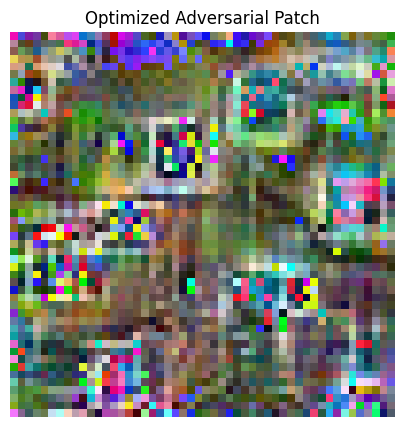

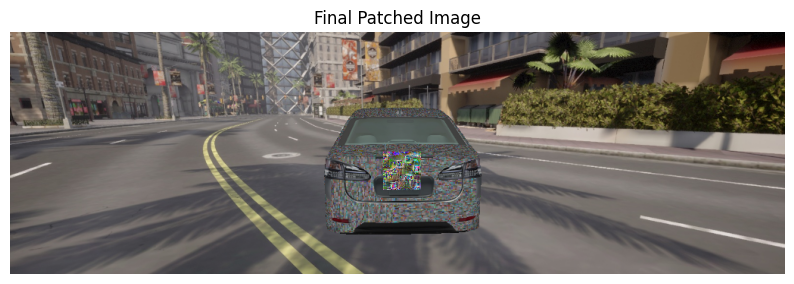

In [ ]:
import os
import cv2
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from ultralytics import YOLO

from monodepth2 import networks
from monodepth2.layers import disp_to_depth
from monodepth2.utils import download_model_if_doesnt_exist

# Set device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load MonoDepth2 model
model_name = 'mono_1024x320'  # Change to your desired model
download_model_if_doesnt_exist(model_name)
encoder_path = os.path.join("models", model_name, "encoder.pth")
depth_decoder_path = os.path.join("models", model_name, "depth.pth")

encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.DepthDecoder(num_ch_enc=encoder.num_ch_enc, scales=range(4))

loaded_dict_enc = torch.load(encoder_path, map_location=DEVICE)
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)
encoder.to(DEVICE)
encoder.eval()

loaded_dict = torch.load(depth_decoder_path, map_location=DEVICE)
depth_decoder.load_state_dict(loaded_dict)
depth_decoder.to(DEVICE)
depth_decoder.eval()

# Load YOLOv8 model for car detection
yolo_model = YOLO('yolov8n.pt')
yolo_model.overrides['verbose'] = False

# Load image and adversarial patch
input_image_path = "/content/augmented_img_74.png"  # Change to your image path
patch_path = "/content/texture_seed.png"  # Change to your patch path
adv_patch_image = cv2.imread(patch_path)
adv_patch_image = cv2.cvtColor(adv_patch_image, cv2.COLOR_BGR2RGB)

# Image transformations
transform = transforms.Compose([
    transforms.Resize((320, 1024)),
    transforms.ToTensor(),
])

# Load and transform the input image
input_image = Image.open(input_image_path).convert("RGB")
input_tensor = transform(input_image).unsqueeze(0).to(DEVICE)

# Transform the adversarial patch
patch_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((50, 50)),  # Resize patch to a fixed size
    transforms.ToTensor(),
])
adv_patch = patch_transform(adv_patch_image).to(DEVICE)
adv_patch.requires_grad = True  # Ensure the patch requires gradients

# Function to apply the adversarial patch
def apply_patch(image, patch, location):
    _, patch_height, patch_width = patch.shape
    center_y = location[1] + (location[3] - location[1]) // 2
    center_x = location[0] + (location[2] - location[0]) // 2
    top_left_y = max(center_y - patch_height // 2, 0)
    top_left_x = max(center_x - patch_width // 2, 0)
    bottom_right_y = min(top_left_y + patch_height, image.shape[1])
    bottom_right_x = min(top_left_x + patch_width, image.shape[2])

    patched_image = image.clone()
    patched_image[:, top_left_y:bottom_right_y, top_left_x:bottom_right_x] = patch[:, :bottom_right_y-top_left_y, :bottom_right_x-top_left_x]

    return patched_image

# Optimizer for the adversarial patch
optimizer = torch.optim.Adam([adv_patch], lr=0.01)
iterations = 100

for i in range(iterations):
    optimizer.zero_grad()

    # Detect the car in the image using YOLOv8
    raw_img_rgb = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)
    results = yolo_model.predict(raw_img_rgb)
    car_detections = [det for det in results[0].boxes if int(det.cls[0]) == 2]  # Class 2 is for cars in COCO dataset

    if len(car_detections) == 0:
        print("No car detected in the image.")
        break

    car = car_detections[0]
    x1, y1, x2, y2 = int(car.xyxy[0][0]), int(car.xyxy[0][1]), int(car.xyxy[0][2]), int(car.xyxy[0][3])
    car_location = (x1, y1, x2, y2)

    # Apply patch to the car
    patched_image = apply_patch(input_tensor.squeeze(0), adv_patch, car_location)
    patched_image = patched_image.unsqueeze(0)

    # Run patched image through MonoDepth2 model
    features = encoder(patched_image)
    outputs = depth_decoder(features)
    disp = outputs[("disp", 0)]
    _, depth = disp_to_depth(disp, 0.1, 100)

    # Define loss as the variance of the depth map (to minimize recognizability)
    loss = torch.var(depth)

    # Backpropagate loss and update patch
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(f"Iteration {i+1}/{iterations}, Loss: {loss.item()}")

# Display the optimized adversarial patch
optimized_patch_np = adv_patch.detach().cpu().numpy().transpose(1, 2, 0)
optimized_patch_np = (optimized_patch_np * 255).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.imshow(optimized_patch_np)
plt.title('Optimized Adversarial Patch')
plt.axis('off')
plt.show()

# Display the final patched image
final_patched_image = apply_patch(input_tensor.squeeze(0), adv_patch, car_location)
final_patched_image_np = final_patched_image.detach().cpu().numpy().transpose(1, 2, 0)
final_patched_image_np = (final_patched_image_np * 255).astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.imshow(final_patched_image_np)
plt.title('Final Patched Image')
plt.axis('off')
plt.show()


Iteration 1/100, Loss: -0.6920766234397888
Iteration 11/100, Loss: -0.7167076468467712
Iteration 21/100, Loss: -0.7273873686790466
Iteration 31/100, Loss: -0.7342159748077393
Iteration 41/100, Loss: -0.7390884757041931
Iteration 51/100, Loss: -0.7428240180015564
Iteration 61/100, Loss: -0.7460337281227112
Iteration 71/100, Loss: -0.7487026453018188
Iteration 81/100, Loss: -0.7510338425636292
Iteration 91/100, Loss: -0.753133237361908
Optimized patch saved to /content/optimized_patch.png
Final patched image saved to /content/final_patched_image.png


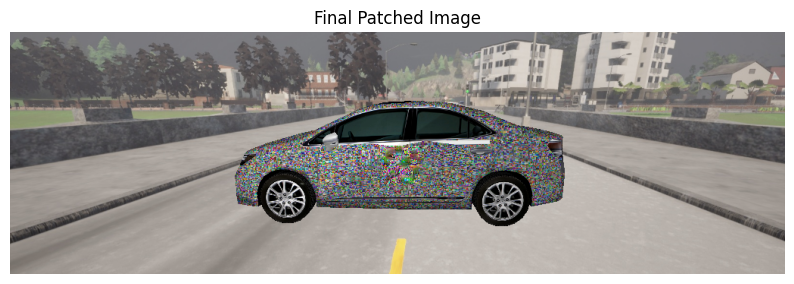

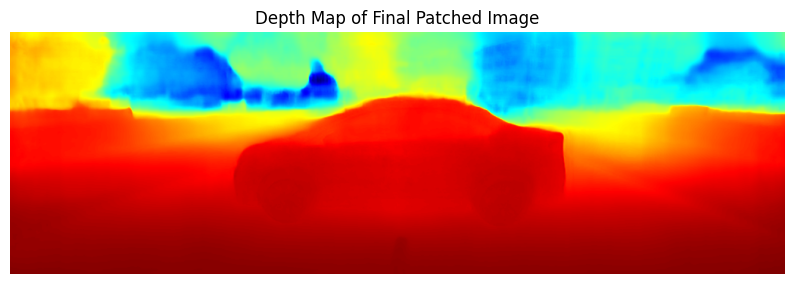

In [ ]:
import os
import cv2
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from ultralytics import YOLO

from monodepth2 import networks
from monodepth2.layers import disp_to_depth
from monodepth2.utils import download_model_if_doesnt_exist

# Set device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load MonoDepth2 model
model_name = 'mono_1024x320'  # Change to your desired model
download_model_if_doesnt_exist(model_name)
encoder_path = os.path.join("models", model_name, "encoder.pth")
depth_decoder_path = os.path.join("models", model_name, "depth.pth")

encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.DepthDecoder(num_ch_enc=encoder.num_ch_enc, scales=range(4))

loaded_dict_enc = torch.load(encoder_path, map_location=DEVICE)
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)
encoder.to(DEVICE)
encoder.eval()

loaded_dict = torch.load(depth_decoder_path, map_location=DEVICE)
depth_decoder.load_state_dict(loaded_dict)
depth_decoder.to(DEVICE)
depth_decoder.eval()

# Load YOLOv8 model for car detection
yolo_model = YOLO('yolov8n.pt')
yolo_model.overrides['verbose'] = False

# Load image and adversarial patch
input_image_path = "/content/epoch_0_augmented_img_19.png"  # Change to your image path
patch_path = "/content/texture_seed.png"  # Change to your patch path
adv_patch_image = cv2.imread(patch_path)
adv_patch_image = cv2.cvtColor(adv_patch_image, cv2.COLOR_BGR2RGB)

# Image transformations
transform = transforms.Compose([
    transforms.Resize((320, 1024)),
    transforms.ToTensor(),
])

# Load and transform the input image
input_image = Image.open(input_image_path).convert("RGB")
input_tensor = transform(input_image).unsqueeze(0).to(DEVICE)

# Transform the adversarial patch
patch_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((50, 50)),  # Resize patch to a fixed size
    transforms.ToTensor(),
])
adv_patch = patch_transform(adv_patch_image).to(DEVICE)
adv_patch.requires_grad = True  # Ensure the patch requires gradients

# Function to apply the adversarial patch
def apply_patch(image, patch, location):
    _, patch_height, patch_width = patch.shape
    center_y = location[1] + (location[3] - location[1]) // 2
    center_x = location[0] + (location[2] - location[0]) // 2
    top_left_y = max(center_y - patch_height // 2, 0)
    top_left_x = max(center_x - patch_width // 2, 0)
    bottom_right_y = min(top_left_y + patch_height, image.shape[1])
    bottom_right_x = min(top_left_x + patch_width, image.shape[2])

    patched_image = image.clone()
    patched_image[:, top_left_y:bottom_right_y, top_left_x:bottom_right_x] = patch[:, :bottom_right_y-top_left_y, :bottom_right_x-top_left_x]

    return patched_image

# Optimizer for the adversarial patch
optimizer = torch.optim.Adam([adv_patch], lr=0.01)
iterations = 100

for i in range(iterations):
    optimizer.zero_grad()

    # Detect the car in the image using YOLOv8
    raw_img_rgb = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)
    results = yolo_model.predict(raw_img_rgb)
    car_detections = [det for det in results[0].boxes if int(det.cls[0]) == 2]  # Class 2 is for cars in COCO dataset

    if len(car_detections) == 0:
        print("No car detected in the image.")
        break

    car = car_detections[0]
    x1, y1, x2, y2 = int(car.xyxy[0][0]), int(car.xyxy[0][1]), int(car.xyxy[0][2]), int(car.xyxy[0][3])
    car_location = (x1, y1, x2, y2)

    # Apply patch to the car
    patched_image = apply_patch(input_tensor.squeeze(0), adv_patch, car_location)
    patched_image = patched_image.unsqueeze(0)

    # Run patched image through MonoDepth2 model
    features = encoder(patched_image)
    outputs = depth_decoder(features)
    disp = outputs[("disp", 0)]
    _, depth = disp_to_depth(disp, 0.1, 100)

    # Define loss as the variance of the depth map (to minimize recognizability)
    loss = -torch.mean(depth)

    # Backpropagate loss and update patch
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(f"Iteration {i+1}/{iterations}, Loss: {loss.item()}")

# Save the optimized adversarial patch
optimized_patch_np = adv_patch.detach().cpu().numpy().transpose(1, 2, 0)
optimized_patch_np = (optimized_patch_np * 255).astype(np.uint8)
optimized_patch_image = Image.fromarray(optimized_patch_np)
optimized_patch_path = "/content/optimized_patch.png"
optimized_patch_image.save(optimized_patch_path)
print(f"Optimized patch saved to {optimized_patch_path}")

# Load the optimized patch and apply it to the input image for testing
optimized_patch = np.array(optimized_patch_image)  # Convert PIL image to numpy array
optimized_patch = patch_transform(optimized_patch).to(DEVICE)

# Apply the optimized patch to the input image
final_patched_image = apply_patch(input_tensor.squeeze(0), optimized_patch, car_location)
final_patched_image_np = final_patched_image.detach().cpu().numpy().transpose(1, 2, 0)
final_patched_image_np = (final_patched_image_np * 255).astype(np.uint8)

# Save the final patched image
final_patched_image_pil = Image.fromarray(final_patched_image_np)
final_patched_image_path = "/content/final_patched_image.png"
final_patched_image_pil.save(final_patched_image_path)
print(f"Final patched image saved to {final_patched_image_path}")

# Display the final patched image
plt.figure(figsize=(10, 10))
plt.imshow(final_patched_image_np)
plt.title('Final Patched Image')
plt.axis('off')
plt.show()

# Run the patched image through MonoDepth2 model and visualize the depth map
final_patched_image_tensor = transform(Image.fromarray(final_patched_image_np)).unsqueeze(0).to(DEVICE)

with torch.no_grad():
    features = encoder(final_patched_image_tensor)
    outputs = depth_decoder(features)
    disp = outputs[("disp", 0)]
    _, depth = disp_to_depth(disp, 0.1, 100)

# Normalize depth map for display
depth_resized = depth.squeeze().cpu().numpy()
depth_normalized = cv2.normalize(depth_resized, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
depth_colormap = cv2.applyColorMap(depth_normalized, cv2.COLORMAP_JET)

# Display the depth map
plt.figure(figsize=(10, 10))
plt.imshow(depth_colormap)
plt.title('Depth Map of Final Patched Image')
plt.axis('off')
plt.show()


-> Downloading pretrained model to models/mono+stereo_1024x320.zip
   Unzipping model...
   Model unzipped to models/mono+stereo_1024x320


100%|██████████| 6.25M/6.25M [00:00<00:00, 125MB/s]


Iteration 1/500, Loss: -5.265224933624268
Iteration 11/500, Loss: -8.920088768005371
Iteration 21/500, Loss: -11.31918716430664
Iteration 31/500, Loss: -16.4512939453125
Iteration 41/500, Loss: -25.110591888427734
Iteration 51/500, Loss: -38.61270523071289
Iteration 61/500, Loss: -51.152889251708984
Iteration 71/500, Loss: -60.29350662231445
Iteration 81/500, Loss: -65.93382263183594
Iteration 91/500, Loss: -69.43440246582031
Iteration 101/500, Loss: -72.22215270996094
Iteration 111/500, Loss: -74.76212310791016
Iteration 121/500, Loss: -77.24390411376953
Iteration 131/500, Loss: -79.0989761352539
Iteration 141/500, Loss: -80.45618438720703
Iteration 151/500, Loss: -81.74844360351562
Iteration 161/500, Loss: -82.85237121582031
Iteration 171/500, Loss: -83.84906768798828
Iteration 181/500, Loss: -84.69581604003906
Iteration 191/500, Loss: -85.39167785644531
Iteration 201/500, Loss: -85.963623046875
Iteration 211/500, Loss: -86.45479583740234
Iteration 221/500, Loss: -86.86800384521484
I

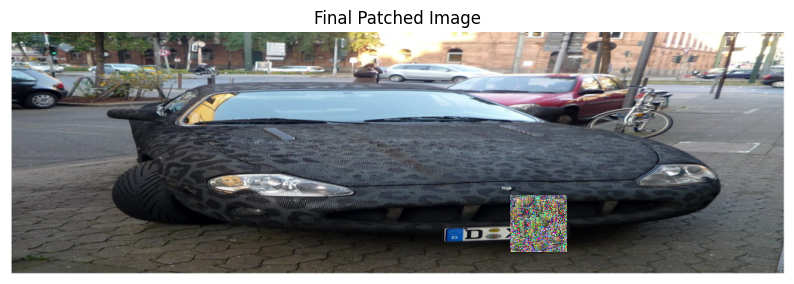

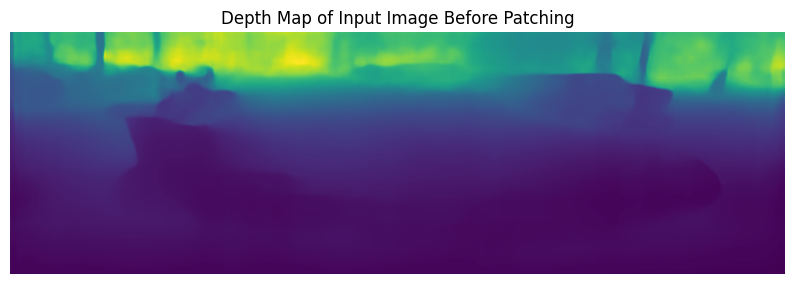

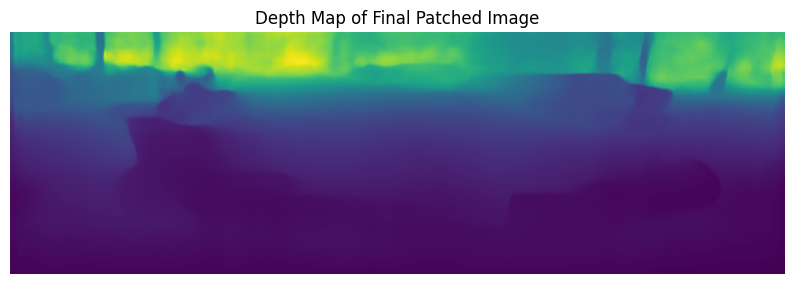

In [ ]:
import os
import cv2
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from ultralytics import YOLO

from monodepth2 import networks
from monodepth2.layers import disp_to_depth
from monodepth2.utils import download_model_if_doesnt_exist

# Set device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load MonoDepth2 model
model_name = 'mono+stereo_1024x320'  # Change to your desired model
download_model_if_doesnt_exist(model_name)
encoder_path = os.path.join("models", model_name, "encoder.pth")
depth_decoder_path = os.path.join("models", model_name, "depth.pth")

encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.DepthDecoder(num_ch_enc=encoder.num_ch_enc, scales=range(4))

loaded_dict_enc = torch.load(encoder_path, map_location=DEVICE)
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)
encoder.to(DEVICE)
encoder.eval()

loaded_dict = torch.load(depth_decoder_path, map_location=DEVICE)
depth_decoder.load_state_dict(loaded_dict)
depth_decoder.to(DEVICE)
depth_decoder.eval()

# Load YOLOv8 model for car detection
yolo_model = YOLO('yolov8n.pt')
yolo_model.overrides['verbose'] = False

# Load image and adversarial patch
input_image_path = "/content/6PYGL.jpg"  # Change to your image path
patch_path = "/content/texture_seed.png"  # Change to your patch path
adv_patch_image = cv2.imread(patch_path)
adv_patch_image = cv2.cvtColor(adv_patch_image, cv2.COLOR_BGR2RGB)

# Image transformations
transform = transforms.Compose([
    transforms.Resize((320, 1024)),
    transforms.ToTensor(),
])

# Load and transform the input image
input_image = Image.open(input_image_path).convert("RGB")
input_tensor = transform(input_image).unsqueeze(0).to(DEVICE)

# Transform the adversarial patch
patch_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((75, 75)),  # Increase patch size
    transforms.ToTensor(),
])
adv_patch = patch_transform(adv_patch_image).to(DEVICE)
adv_patch.requires_grad = True  # Ensure the patch requires gradients

# Function to apply the adversarial patch
def apply_patch(image, patch, location):
    _, patch_height, patch_width = patch.shape
    center_y = location[1] + (location[3] - location[1]) // 2
    center_x = location[0] + (location[2] - location[0]) // 2
    top_left_y = max(center_y - patch_height // 2, 0)
    top_left_x = max(center_x - patch_width // 2, 0)
    bottom_right_y = min(top_left_y + patch_height, image.shape[1])
    bottom_right_x = min(top_left_x + patch_width, image.shape[2])

    patched_image = image.clone()
    patched_image[:, top_left_y:bottom_right_y, top_left_x:bottom_right_x] = patch[:, :bottom_right_y-top_left_y, :bottom_right_x-top_left_x]

    return patched_image, (top_left_y, bottom_right_y, top_left_x, bottom_right_x)

# Optimizer for the adversarial patch
optimizer = torch.optim.Adam([adv_patch], lr=0.005)  # Adjust learning rate
iterations = 500  # Increase number of iterations

for i in range(iterations):
    optimizer.zero_grad()

    # Detect the car in the image using YOLOv8
    raw_img_rgb = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)
    results = yolo_model.predict(raw_img_rgb)
    car_detections = [det for det in results[0].boxes if int(det.cls[0]) == 2]  # Class 2 is for cars in COCO dataset

    if len(car_detections) == 0:
        print("No car detected in the image.")
        break

    car = car_detections[0]
    x1, y1, x2, y2 = int(car.xyxy[0][0]), int(car.xyxy[0][1]), int(car.xyxy[0][2]), int(car.xyxy[0][3])
    car_location = (x1, y1, x2, y2)

    # Apply patch to the car
    patched_image, patch_coords = apply_patch(input_tensor.squeeze(0), adv_patch, car_location)
    patched_image = patched_image.unsqueeze(0)

    # Run patched image through MonoDepth2 model
    features = encoder(patched_image)
    outputs = depth_decoder(features)
    disp = outputs[("disp", 0)]
    _, depth = disp_to_depth(disp, 0.1, 100)

    # Extract the depth values in the patched region
    top_left_y, bottom_right_y, top_left_x, bottom_right_x = patch_coords
    patch_depth = depth[:, :, top_left_y:bottom_right_y, top_left_x:bottom_right_x]

    # Define loss as the negative mean depth in the patched region (to maximize depth)
    loss = -torch.mean(patch_depth)

    # Backpropagate loss and update patch
    loss.backward()
    torch.nn.utils.clip_grad_norm_([adv_patch], max_norm=1.0)  # Apply gradient clipping
    optimizer.step()

    if i % 10 == 0:
        print(f"Iteration {i+1}/{iterations}, Loss: {loss.item()}")

# Save the optimized adversarial patch
optimized_patch_np = adv_patch.detach().cpu().numpy().transpose(1, 2, 0)
optimized_patch_np = (optimized_patch_np * 255).astype(np.uint8)
optimized_patch_image = Image.fromarray(optimized_patch_np)
optimized_patch_path = "/content/optimized_patch.png"
optimized_patch_image.save(optimized_patch_path)
print(f"Optimized patch saved to {optimized_patch_path}")

# Load the optimized patch and apply it to the input image for testing
optimized_patch = np.array(optimized_patch_image)  # Convert PIL image to numpy array
optimized_patch = patch_transform(optimized_patch).to(DEVICE)

# Apply the optimized patch to the input image
final_patched_image, _ = apply_patch(input_tensor.squeeze(0), optimized_patch, car_location)
final_patched_image_np = final_patched_image.detach().cpu().numpy().transpose(1, 2, 0)
final_patched_image_np = (final_patched_image_np * 255).astype(np.uint8)

# Save the final patched image
final_patched_image_pil = Image.fromarray(final_patched_image_np)
final_patched_image_path = "/content/final_patched_image.png"
final_patched_image_pil.save(final_patched_image_path)
print(f"Final patched image saved to {final_patched_image_path}")

# Display the final patched image
plt.figure(figsize=(10, 10))
plt.imshow(final_patched_image_np)
plt.title('Final Patched Image')
plt.axis('off')
plt.show()

# Run the input image (before patching) through MonoDepth2 model and visualize the depth map
with torch.no_grad():
    features = encoder(input_tensor)
    outputs = depth_decoder(features)
    disp = outputs[("disp", 0)]
    _, depth = disp_to_depth(disp, 0.1, 100)

# Normalize depth map for display
depth_resized = depth.squeeze().cpu().numpy()
depth_normalized = (depth_resized - depth_resized.min()) / (depth_resized.max() - depth_resized.min())
depth_colormap = plt.cm.viridis(depth_normalized)

# Display the depth map of the input image before patching
plt.figure(figsize=(10, 10))
plt.imshow(depth_colormap)
plt.title('Depth Map of Input Image Before Patching')
plt.axis('off')
plt.show()

# Run the patched image through MonoDepth2 model and visualize the depth map
final_patched_image_tensor = transform(Image.fromarray(final_patched_image_np)).unsqueeze(0).to(DEVICE)

with torch.no_grad():
    features = encoder(final_patched_image_tensor)
    outputs = depth_decoder(features)
    disp = outputs[("disp", 0)]
    _, depth = disp_to_depth(disp, 0.1, 100)

# Normalize depth map for display
depth_resized = depth.squeeze().cpu().numpy()
depth_normalized = (depth_resized - depth_resized.min()) / (depth_resized.max() - depth_resized.min())
depth_colormap = plt.cm.viridis(depth_normalized)

# Display the depth map of the final patched image
plt.figure(figsize=(10, 10))
plt.imshow(depth_colormap)
plt.title('Depth Map of Final Patched Image')
plt.axis('off')
plt.show()
